In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### dataset

In [3]:
path = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\UpdatedResumeDataSet.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
# \r\ escape sequence
df.iloc[0]['Resume']

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [6]:
print('hello\nworld')

hello
world


In [7]:
print('hello world\rworld') # what \r does is takes the pointer again to the start of the line
# like in our case hello world was printed and then the buffer was moved to the start that is where the 'h' is now world is printed again
# world world there hello is overwritten by world and the text above that remains as it is

world world


In [8]:
print('Welcome\rworld')

worldme


In [9]:
X = df['Resume']
y = df['Category']

#### EDA

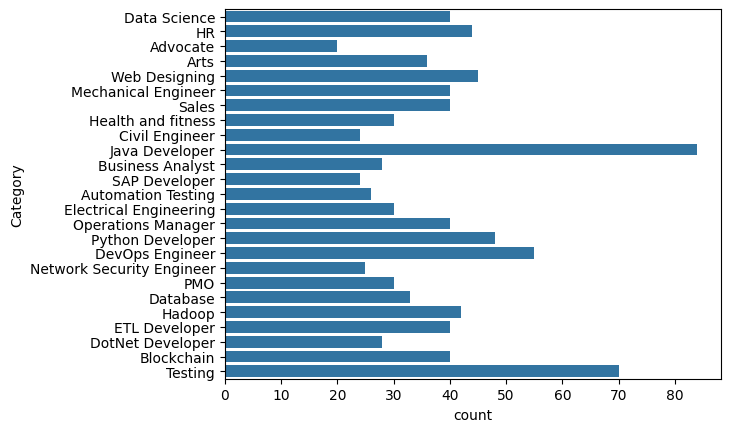

In [28]:
sns.countplot(y);

In [30]:
y.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

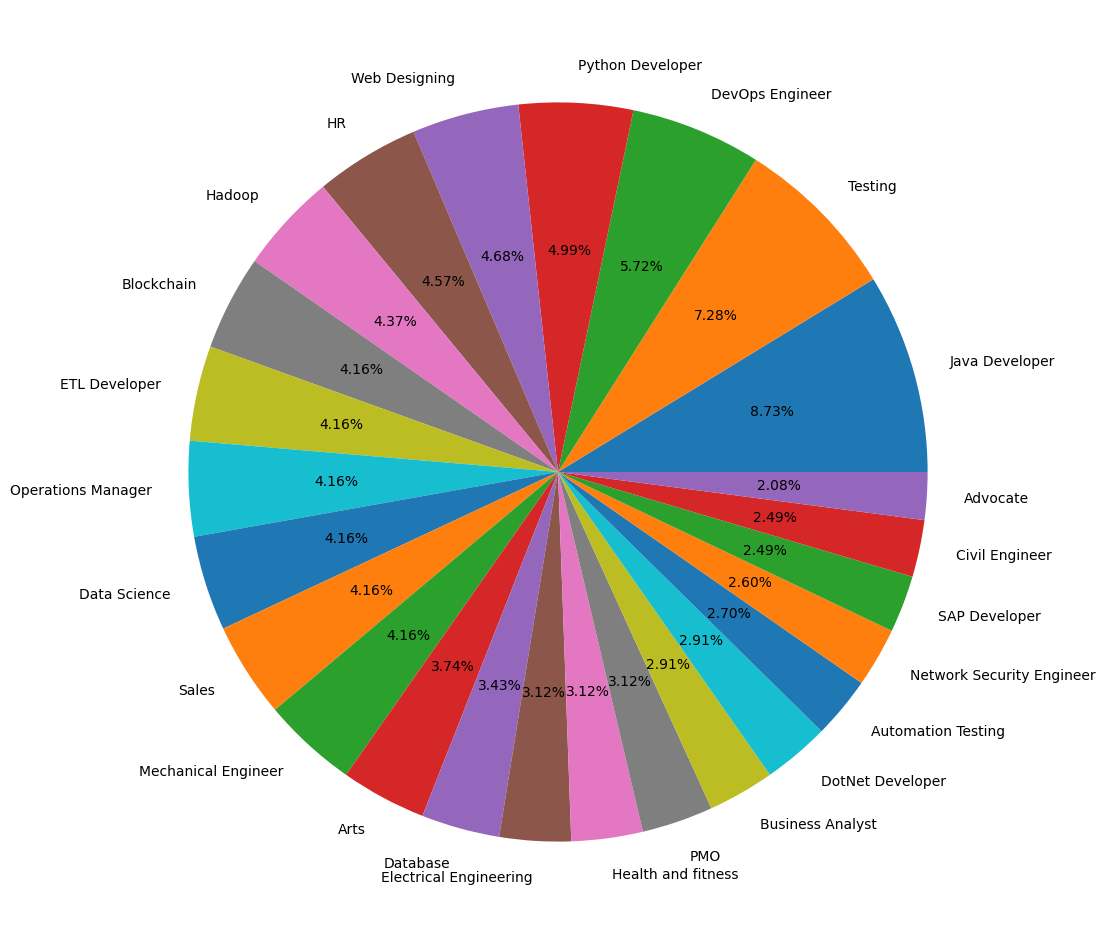

In [34]:
plt.figure(figsize = (12, 12))
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%2.2f%%');

In [62]:
def cleanResume(resumeText):
    import re
    import string
    resumeText = re.sub(r'http\S+\s*', ' ', resumeText) # removes urls
    resumeText = re.sub(r'RT|cc', ' ', resumeText) # removes RT and cc
    resumeText = re.sub(r'#\S+', ' ', resumeText) # removes hashtags
    resumeText = re.sub(r'@\S+', ' ', resumeText) # removes remove mentions
    resumeText = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', resumeText) # removes punctuation # like c %s acts as placeholders and % re.escape(string.punctuation) acts as variable
    resumeText = re.sub(r'[^\x00-\x7f]', ' ', resumeText) # removes urls
    resumeText = re.sub(r'\s+', ' ', resumeText) # removes extra whitespace
# [^\x00-\x7f]: Matches any character outside the ASCII range (0x00 to 0x7f).
    return resumeText

In [64]:
cleanedResume = cleanResume(X[0])
cleanedResume

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [78]:
cleandata = ''
c = 0
for data in X:
    c += 1
    cleandata += cleanResume(data)
    if c == 900:
        break
len(cleandata)

2698185

In [98]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'black').generate(cleandata)

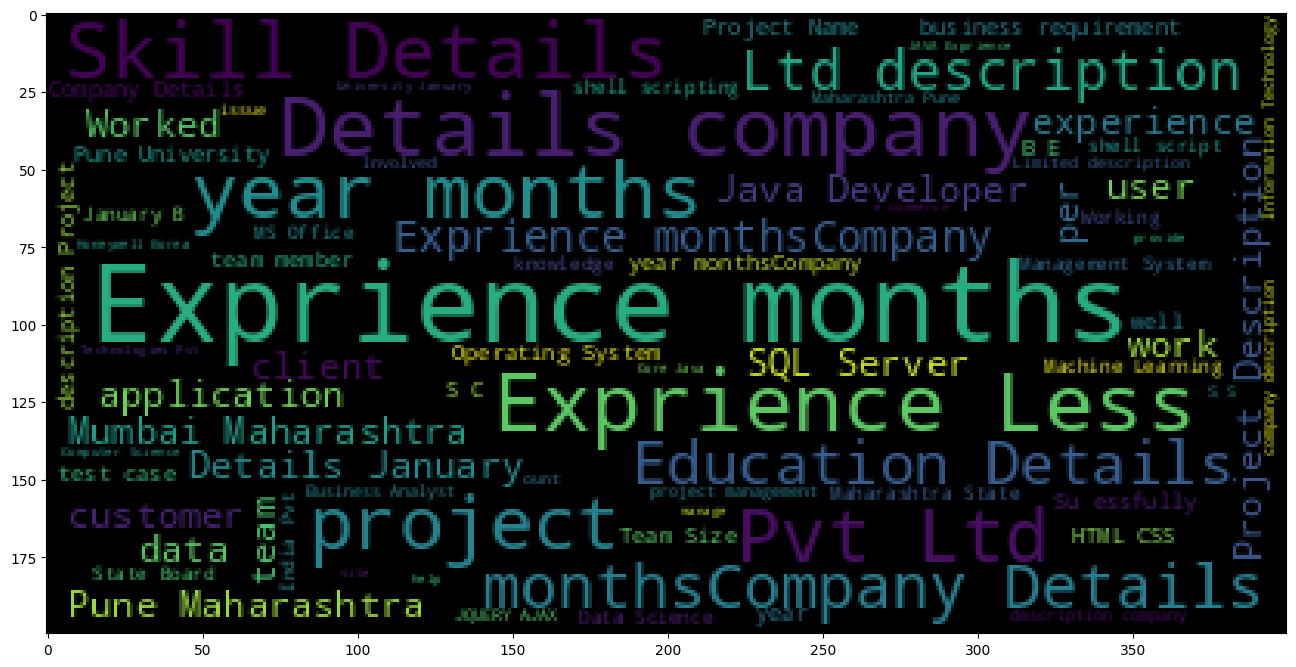

In [99]:
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud)

In [102]:
wordcloud.words_ 

{'Exprience months': 1.0,
 'Exprience Less': 0.5547843331680714,
 'Details company': 0.5528011898859693,
 'year months': 0.451165096678235,
 'Skill Details': 0.44620723847297966,
 'Pvt Ltd': 0.40208230044620724,
 'project': 0.3911750123946455,
 'monthsCompany Details': 0.3475458601883986,
 'Education Details': 0.32126921170054534,
 'Ltd description': 0.29102627664848785,
 'Exprience monthsCompany': 0.24095190877540903,
 'Details January': 0.18393653941497273,
 'SQL Server': 0.1819533961328706,
 'Pune Maharashtra': 0.17798710956866634,
 'team': 0.16955875061973227,
 'client': 0.16559246405552802,
 'per': 0.15716410510659395,
 'application': 0.15716410510659395,
 'data': 0.15666831928606842,
 'customer': 0.15567674764501735,
 'Worked': 0.1536936043629152,
 'user': 0.1442736737729301,
 'Java Developer': 0.13882002974714924,
 'Mumbai Maharashtra': 0.1383242439266237,
 'experience': 0.1308874566187407,
 'work': 0.12890431333663857,
 'Project Description': 0.11898859692612791,
 'Operating Sy

In [120]:
cleaned = X.apply(cleanResume)

In [122]:
tfid = TfidfVectorizer(stop_words = 'english')

In [126]:
X_new = tfid.fit_transform(cleaned)

In [128]:
X_new.shape

(962, 7351)

#### Cross - validation

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state = 0, stratify = y)

In [133]:
X_train.shape, X_test.shape

((721, 7351), (241, 7351))

# Build the model

In [136]:
from sklearn.neighbors import NearestCentroid

In [138]:
nc = NearestCentroid()
nc.fit(X_train, y_train)

NearestCentroid()

In [140]:
len(nc.centroids_)

25

#### performance evaluation

In [143]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [145]:
y_pred = nc.predict(X_test)

In [147]:
accuracy_score(y_test, y_pred)

0.9875518672199171

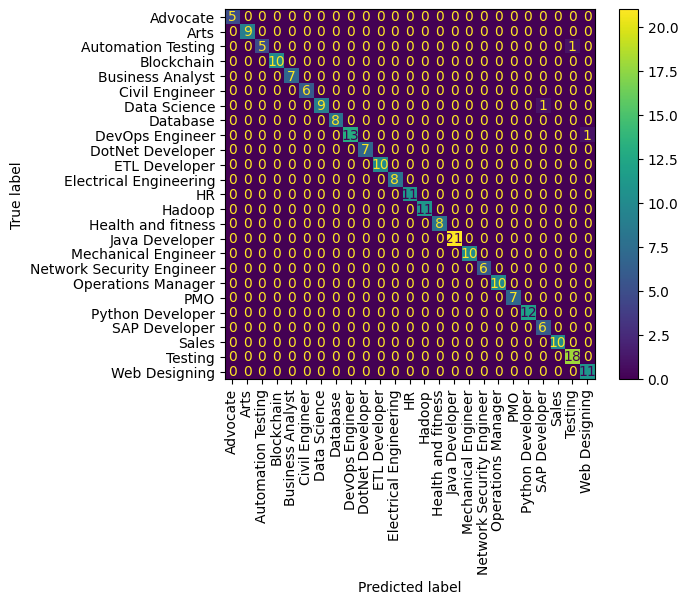

In [156]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation = 90);

In [158]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.83      0.91         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

In [160]:
### prediction on unseen data

In [166]:
with open(r"C:\Users\DAI.STUDENTSDC\Downloads\Sample_resume.txt", 'r') as f:
    resumes = f.read()

In [173]:
resumes = cleanResume(resumes)
resumes

'Tejashree Pishe Jr Machine Learning Engineer MITU Research EXPERIENCE MITU Research New Sangavi Pune Feb 2021 till date Hiko Technology Pvt Ltd Baner Pune Full Time Internship August 2019 May 2020 KEY PROJECTS Predictive Analytics Implemented for Pistachio Types over quality parameter database Study the origin trade business and nutritional values over Pistachio types Review the quality of pistachio types over its quality pararameters Critically evaluate and data preprocessing over the database Used the Resampling techniques to work on imbalanced data set Identify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis Find out the best suitable algorithm with more than 90 a uracy to predict the type of pistachio over new data Updating and upgrading the model with non predictable data Technologies Python for Data Science NumPY Panda Machine Learning Algorithms Design and development of Decision support System for selection of New Resu

In [177]:
resumes = tfid.transform([resumes])

In [179]:
y_pred = nc.predict(resumes)

In [181]:
y_pred

array(['Data Science'], dtype=object)